In [57]:
import geopandas as gpd
import pandas as pd

# ËÆæÁΩÆÊäïÂΩ±ÂùêÊ†áÁ≥ª‰∏∫ UTM zone 49NÔºàÈÄÇÂêàÊ∑±Âú≥Ôºâ
target_crs = "EPSG:32650"

# 1. ËØªÂèñÂéüÂßãËΩ®ËøπÊï∞ÊçÆÔºàWGS84ÊäïÂΩ±Ôºâ
shp_2019 = gpd.read_file("Keep data/Áè†‰∏âËßí2019.shp")
shp_2020 = gpd.read_file("Keep data/Áè†‰∏âËßí2020.shp")

# 2. Á°Æ‰øùÂéüÂßãÂùêÊ†áÁ≥ª‰∏∫ EPSG:4326
if shp_2019.crs is None:
    shp_2019.set_crs("EPSG:4326", inplace=True)
if shp_2020.crs is None:
    shp_2020.set_crs("EPSG:4326", inplace=True)

# 3. ÊäïÂΩ±ËΩ¨Êç¢Âà∞ UTM 49NÔºàEPSG:32649Ôºâ
shp_2019_utm = shp_2019.to_crs(target_crs)
shp_2020_utm = shp_2020.to_crs(target_crs)

# 4. ÂêàÂπ∂Êï∞ÊçÆ
merged = gpd.GeoDataFrame(pd.concat([shp_2019_utm, shp_2020_utm], ignore_index=True), crs=target_crs)

# 5. ËæìÂá∫‰ø°ÊÅØ
print(f"ÂêàÂπ∂ÂêéËΩ®ËøπÊÄªÊù°Êï∞Ôºö{len(merged)}")
print("Á§∫‰æãËÆ∞ÂΩïÔºö")
print(merged.head())

# 6. ‰øùÂ≠ò‰∏∫Êñ∞ÁöÑshpÊñá‰ª∂
merged.to_file("19to20Keep.shp", driver="ESRI Shapefile")


ÂêàÂπ∂ÂêéËΩ®ËøπÊÄªÊù°Êï∞Ôºö58807
Á§∫‰æãËÆ∞ÂΩïÔºö
   FID                                           geometry
0    0  LINESTRING (346338.67 2537611.671, 346331.945 ...
1    1  LINESTRING (346433.303 2537611.8, 346435.682 2...
2    2  LINESTRING (346338.67 2537611.671, 346331.945 ...
3    3  LINESTRING (346433.303 2537611.8, 346435.682 2...
4    4  LINESTRING (347788.372 2514321.698, 347744.776...


In [58]:
import geopandas as gpd
from shapely.ops import unary_union

# 1. ËØªÂèñÊ∑±Âú≥Ë°åÊîøÂå∫Âàí
admin = gpd.read_file("Ë°åÊîøËæπÁïå/Ê∑±Âú≥_ÂéøÁ∫ßÂå∫Âàí.shp")

# 2. ÂùêÊ†áÁ≥ªÁªü‰∏ÄÔºàÁªü‰∏Ä‰∏∫ EPSG:32650Ôºâ
admin = admin.to_crs("EPSG:32650")

# 3. ÂêàÂπ∂Ê∑±Âú≥ÊâÄÊúâÂéøÂå∫ËæπÁïåÂπ∂Â§ñÊâ©1000Á±≥ÁºìÂÜ≤
shenzhen_union = unary_union(admin.geometry)
shenzhen_buffer = gpd.GeoDataFrame(geometry=[shenzhen_union.buffer(1000)], crs=admin.crs)

# ËØªÂèñËΩ®ËøπÊï∞ÊçÆ
merged = gpd.read_file("Keep data/19to20Keep.shp")

# ËΩ¨Êç¢Âà∞ EPSG:32650
#merged = merged.to_crs("EPSG:32650")

# Ë£ÅÂâ™
merged_in_sz = gpd.overlay(merged, shenzhen_buffer, how='intersection')

# ‰øùÂ≠ò
merged_in_sz.to_file("19to20Keep_SZ.shp", driver="ESRI Shapefile")



# Â§ÑÁêÜËøêÂä®ËΩ®Ëøπ|

In [59]:
import matplotlib.pyplot as plt
import matplotlib
# ËÆæÁΩÆÊîØÊåÅ‰∏≠ÊñáÁöÑÂ≠ó‰Ωì
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ÂèØ‰ª•ÈÄâÊã©ÂÖ∂‰ªñÊîØÊåÅ‰∏≠ÊñáÁöÑÂ≠ó‰ΩìÔºå‰æãÂ¶Ç 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
import geopandas as gpd

# ËØªÂèñËΩ®ËøπShapefileÊñá‰ª∂
gdf = gpd.read_file('Keep data/19to20Keep_SZ.shp')

# ËÆæÁΩÆÂùêÊ†áÁ≥ª‰∏∫32649ÔºàÂ¶ÇÊûúÈúÄË¶ÅËΩ¨Êç¢Ôºâ
gdf = gdf.to_crs(epsg=32650)

# ËæìÂá∫Ââç‰∫îÊù°ËÆ∞ÂΩïÁöÑgeometryÂàó
print(gdf[['geometry']].head())


                                            geometry
0  MULTILINESTRING ((168244.119 2519738.927, 1682...
1  LINESTRING (168467.746 2519521.233, 168507.947...
2  MULTILINESTRING ((168764.65 2518007.428, 16873...
3  MULTILINESTRING ((168764.101 2517982.207, 1687...
4  MULTILINESTRING ((168764.626 2518006.332, 1686...


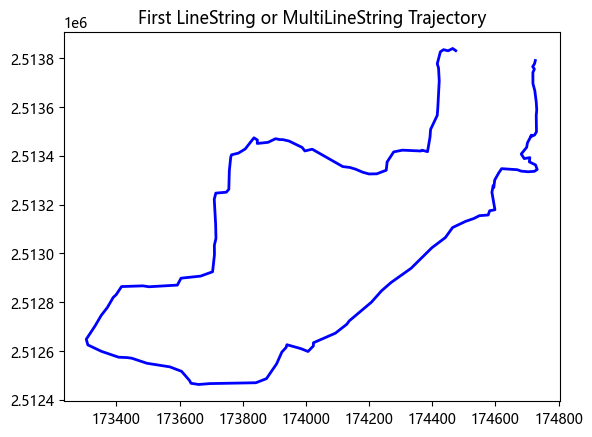

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString

# Ëé∑ÂèñÁ¨¨‰∏ÄÊù°ËΩ®ËøπÁöÑÂá†‰ΩïÂØπË±°
geometry = gdf.loc[274, 'geometry']

# ÂàõÂª∫ÂõæÂΩ¢
fig, ax = plt.subplots()

# Âà§Êñ≠Âá†‰ΩïÁ±ªÂûãÂπ∂ÁªòÂà∂
if isinstance(geometry, LineString):
    # ÊèêÂèñLineStringÁöÑÂùêÊ†áÂπ∂ÁªòÂà∂
    x, y = geometry.xy
    ax.plot(x, y, color='blue', linewidth=2)
elif isinstance(geometry, MultiLineString):
    # Â¶ÇÊûúÊòØMultiLineStringÔºå‰ΩøÁî®geomsÂ±ûÊÄßÈÄê‰∏™ÁªòÂà∂ÊØèÊù°LineString
    for line in geometry.geoms:
        x, y = line.xy
        ax.plot(x, y, color='blue', linewidth=2)

# Ê∑ªÂä†Ê†áÈ¢ò
ax.set_title("First LineString or MultiLineString Trajectory")

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


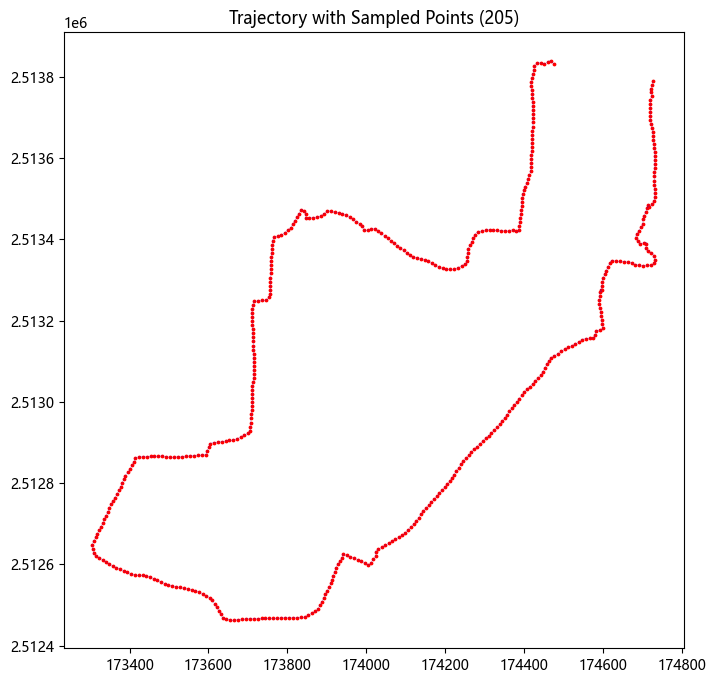

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString, MultiLineString, Point

# ËÆæÂÆöÈááÊ†∑Ê≠•Èïø
step_size = 10  # ÊØèÈöî 20 Á±≥ÈááÊ†∑‰∏Ä‰∏™ÁÇπ

# Á°Æ‰øùÂùêÊ†áÁ≥ª‰∏∫ 32649
gdf = gdf.to_crs(epsg=32650)

# ÈÄâÂèñ 205 Âè∑ËΩ®Ëøπ
geometry = gdf.loc[274, 'geometry']

# Â≠òÂÇ®ÈááÊ†∑ÁÇπ
sampled_points = []

# Ëß£Êûê LineString Êàñ MultiLineString
if isinstance(geometry, MultiLineString):
    lines = list(geometry.geoms)
elif isinstance(geometry, LineString):
    lines = [geometry]
else:
    lines = []

# ÈÅçÂéÜÊØè‰∏™ LineString ËøõË°åÈááÊ†∑
for line in lines:
    num_steps = int(line.length // step_size)  # ËÆ°ÁÆóÊ≠•Êï∞
    for i in range(num_steps + 1):  # ÈááÊ†∑ÁÇπ
        sampled_points.append(line.interpolate(i * step_size))

# ËΩ¨Êç¢ÈááÊ†∑ÁÇπ‰∏∫ numpy Êï∞ÁªÑ
points = np.array([(p.x, p.y) for p in sampled_points])

# ÂèØËßÜÂåñËΩ®ËøπÂèäÈááÊ†∑ÁÇπ
fig, ax = plt.subplots(figsize=(8, 8))

# ÁªòÂà∂ÂéüÂßãËΩ®Ëøπ
for line in lines:
    x, y = line.xy
    ax.plot(x, y, color='blue', linewidth=0.1, label='Original Trajectory')

# ÁªòÂà∂ÈááÊ†∑ÁÇπ
ax.scatter(points[:, 0], points[:, 1], color='red', s=3, label='Sampled Points')

# Ê∑ªÂä†Ê†áÈ¢òÂíåÂõæ‰æã
ax.set_title("Trajectory with Sampled Points (205)")

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

In [65]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString
from scipy.stats import gaussian_kde
from tqdm import tqdm  # ‚úÖ Âä†ËΩΩËøõÂ∫¶Êù°Ê®°Âùó

# Á°Æ‰øùÂùêÊ†áÁ≥ª‰∏∫ EPSG:32649
gdf = gdf.to_crs(epsg=32650)

# ËÆæÂÆöÈááÊ†∑Ê≠•ÈïøÔºàÂçï‰ΩçÔºöÁ±≥Ôºâ
step_size = 10  # ÊØèÈöî 10 Á±≥Âèñ‰∏Ä‰∏™ÁÇπ

# Â≠òÂÇ®ÈááÊ†∑ÁÇπ
sampled_points = []

# ‚úÖ Ê∑ªÂä†ËøõÂ∫¶Êù°
for _, trajectory in tqdm(gdf.iterrows(), total=len(gdf), desc="Sampling points"):
    geometry = trajectory['geometry']

    # Ëß£Êûê LineString Êàñ MultiLineString
    if isinstance(geometry, MultiLineString):
        lines = list(geometry.geoms)
    elif isinstance(geometry, LineString):
        lines = [geometry]
    else:
        lines = []

    # ÈÅçÂéÜÊØè‰∏™ LineString ËøõË°åÈááÊ†∑
    for line in lines:
        num_steps = int(line.length // step_size)  # ËÆ°ÁÆóÊ≠•Êï∞
        for i in range(num_steps + 1):  # ÈááÊ†∑ÁÇπ
            sampled_points.append(line.interpolate(i * step_size))

# ËΩ¨Êç¢ÈááÊ†∑ÁÇπ‰∏∫ numpy Êï∞ÁªÑ
points = np.array([(p.x, p.y) for p in sampled_points])


Sampling points: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18209/18209 [02:55<00:00, 103.56it/s]


In [66]:
import geopandas as gpd
from shapely.geometry import Point

# ÂàõÂª∫ GeoDataFrame
points_gdf = gpd.GeoDataFrame(geometry=[Point(p.x, p.y) for p in sampled_points], crs="EPSG:32650")

# ‰øùÂ≠ò‰∏∫ Shapefile
points_gdf.to_file("10m_Ê∑±Âú≥keepÈááÊ†∑ÁÇπ.shp")


In [67]:
points_gdf

geometry
0         POINT (168244.119 2519738.927)
1          POINT (168250.99 2519746.193)
2         POINT (168258.894 2519747.255)
3         POINT (168267.749 2519742.609)
4         POINT (168275.619 2519736.504)
...                                  ...
11585129  POINT (249466.073 2488508.685)
11585130  POINT (249456.945 2488512.022)
11585131  POINT (249446.946 2488511.893)
11585132  POINT (249436.947 2488511.763)
11585133  POINT (249426.948 2488511.633)

[11585134 rows x 1 columns]

## Ë∑ØÁΩëÈ¢ÑÂ§ÑÁêÜ

In [2]:
import geopandas as gpd

# ËØªÂèñ Shapefile
points_gdf = gpd.read_file("Keep data/10m_Ê∑±Âú≥keepÈááÊ†∑ÁÇπ.shp")

# Êü•ÁúãÂâçÂá†Ë°åÊï∞ÊçÆ
print(points_gdf.head())

# ÊàñËÄÖÊü•ÁúãÂùêÊ†áÂèÇËÄÉÁ≥ªÂíåÊï∞ÊçÆÁªìÊûÑ
print(points_gdf.crs)
print(points_gdf.columns)

   FID                        geometry
0    0  POINT (785040.951 2517071.709)
1    1  POINT (785031.563 2517068.264)
2    2  POINT (785022.175 2517064.819)
3    3  POINT (785012.643 2517063.023)
4    4   POINT (785002.78 2517064.252)
EPSG:32649
Index(['FID', 'geometry'], dtype='object')


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# ==== 1. ËØªÂèñË∑ØÁΩëÊï∞ÊçÆ ====
road_net = gpd.read_file("ÈÅìË∑ØÁΩë/ÁÆÄÂçïË∑ØÁΩë_2023_OSMÈ¢ÑÂ§ÑÁêÜ.shp")

# 1. ‰øùÁïôÂéüÂßãÁöÑ link_id Â≠óÊÆµÔºå‰ΩÜÊñ∞Âª∫‰∏Ä‰∏™ËøûÁª≠ÁöÑ ID Â≠óÊÆµ
road_net['new_id'] = range(1, len(road_net) + 1)

# 2. ËæìÂá∫ÁªìÊûúÔºöÊü•ÁúãÊñ∞Â¢ûÁöÑËøûÁª≠ ID Â≠óÊÆµ
print(road_net[['link_id', 'new_id']].head())

   link_id  new_id
0     29.0       1
1     30.0       2
2     31.0       3
3     32.0       4
4     34.0       5


In [7]:
# ==== ËØªÂèñË°åÊîøËæπÁïå ====
admin_boundary = gpd.read_file("Ë°åÊîøËæπÁïå/Ê∑±Âú≥_ÂéøÁ∫ßÂå∫Âàí.shp")

# ==== ËæìÂá∫Â±ûÊÄßÂ≠óÊÆµÂíåÈ¢ÑËßàÊï∞ÊçÆ ====
print("Â≠óÊÆµÂêçÔºö", admin_boundary.columns.tolist())
print(admin_boundary.head())


Â≠óÊÆµÂêçÔºö ['Âú∞Âêç', 'Âå∫ÂàíÁ†Å', 'ÂéøÁ∫ß', 'ÂéøÁ∫ßÁ†Å', 'ÂéøÁ∫ßÁ±ª', 'Âú∞Á∫ß', 'Âú∞Á∫ßÁ†Å', 'Âú∞Á∫ßÁ±ª', 'ÁúÅÁ∫ß', 'ÁúÅÁ∫ßÁ†Å', 'ÁúÅÁ∫ßÁ±ª', 'ÊõæÁî®Âêç', 'Â§áÊ≥®', 'ENG_NAME', 'VAR_NAME', 'code', 'NAME_3', 'VAR_NAME3', 'GID_3', 'TYPE_3', 'NAME_2', 'VAR_NAME2', 'GID_2', 'TYPE_2', 'NAME_1', 'VAR_NAME1', 'GID_1', 'TYPE_1', 'year', 'geometry']
    Âú∞Âêç     Âå∫ÂàíÁ†Å   ÂéøÁ∫ß     ÂéøÁ∫ßÁ†Å  ÂéøÁ∫ßÁ±ª   Âú∞Á∫ß     Âú∞Á∫ßÁ†Å  Âú∞Á∫ßÁ±ª   ÁúÅÁ∫ß     ÁúÅÁ∫ßÁ†Å  ...  \
0  ÂÆùÂÆâÂå∫  440306  ÂÆùÂÆâÂå∫  440306  Â∏ÇËæñÂå∫  Ê∑±Âú≥Â∏Ç  440300  Âú∞Á∫ßÂ∏Ç  Âπø‰∏úÁúÅ  440000  ...   
1  Á¶èÁî∞Âå∫  440304  Á¶èÁî∞Âå∫  440304  Â∏ÇËæñÂå∫  Ê∑±Âú≥Â∏Ç  440300  Âú∞Á∫ßÂ∏Ç  Âπø‰∏úÁúÅ  440000  ...   
2  ÈæôÂ≤óÂå∫  440307  ÈæôÂ≤óÂå∫  440307  Â∏ÇËæñÂå∫  Ê∑±Âú≥Â∏Ç  440300  Âú∞Á∫ßÂ∏Ç  Âπø‰∏úÁúÅ  440000  ...   
3  ÁΩóÊπñÂå∫  440303  ÁΩóÊπñÂå∫  440303  Â∏ÇËæñÂå∫  Ê∑±Âú≥Â∏Ç  440300  Âú∞Á∫ßÂ∏Ç  Âπø‰∏úÁúÅ  440000  ...   
4  ÁõêÁî∞Âå∫  440308  ÁõêÁî∞Âå∫  440308  Â∏ÇËæñÂå∫  Ê∑±Âú≥Â∏Ç  440300  Âú∞Á∫ßÂ∏Ç  Âπø‰∏úÁúÅ  44000

In [8]:
# ==== Ëã•ÂùêÊ†áÁ≥ª‰∏ç‰∏ÄËá¥ÂàôÁªü‰∏ÄÂùêÊ†áÁ≥ª ====
if road_net.crs != admin_boundary.crs:
    admin_boundary = admin_boundary.to_crs(road_net.crs)

In [12]:
from shapely.ops import unary_union
# ÂêàÂπ∂Ê∑±Âú≥ÊâÄÊúâÂéøÂå∫ËæπÁïåÂπ∂Â§ñÊâ©1000Á±≥
shenzhen_union = unary_union(admin_boundary.geometry)
shenzhen_buffer = gpd.GeoDataFrame(geometry=[shenzhen_union.buffer(1000)], crs=road_net.crs)

# Ë£ÅÂâ™Ë∑ØÁΩë
shenzhen_clipped = gpd.overlay(road_net, shenzhen_buffer, how='intersection')

# ‰øùÂ≠ò‰∏∫ GeoJSON
shenzhen_clipped.to_file("Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë.geojson", driver="GeoJSON")

In [13]:
# Á≠õÈÄâ‰∏â‰∏™Âå∫ÁöÑËæπÁïå
target_districts = ['ÁΩóÊπñÂå∫', 'Á¶èÁî∞Âå∫', 'ÂçóÂ±±Âå∫']
subset = admin_boundary[admin_boundary['Âú∞Âêç'].isin(target_districts)]

# ÂêàÂπ∂‰∏âÂå∫ÂüüËæπÁïåÂπ∂Â§ñÊâ©1000Á±≥
subset_union = unary_union(subset.geometry)
subset_buffer = gpd.GeoDataFrame(geometry=[subset_union.buffer(1000)], crs=road_net.crs)

# Ë£ÅÂâ™Ë∑ØÁΩë
subset_clipped = gpd.overlay(road_net, subset_buffer, how='intersection')

# ‰øùÂ≠ò‰∏∫ GeoJSON
subset_clipped.to_file("ÁΩóÊπñÁ¶èÁî∞ÂçóÂ±±1000mÁºìÂÜ≤Ë∑ØÁΩë.geojson", driver="GeoJSON")

In [19]:
import geopandas as gpd
import momepy
import networkx as nx
from shapely.geometry import LineString, MultiLineString

# ËØªÂèñÊï∞ÊçÆ
gdf = gpd.read_file("Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë.geojson")

# ÊãÜËß£ MultiLineString ‰∏∫ LineString
def explode_multilines(gdf):
    new_rows = []
    for idx, row in gdf.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            new_rows.append(row)
        elif isinstance(geom, MultiLineString):
            for part in geom.geoms:
                new_row = row.copy()
                new_row.geometry = part
                new_rows.append(new_row)
    return gpd.GeoDataFrame(new_rows, columns=gdf.columns, crs=gdf.crs)

# È¢ÑÂ§ÑÁêÜÊ∏ÖÊ¥ó
gdf_cleaned = explode_multilines(gdf).reset_index(drop=True)

# ÊûÑÂª∫ primal Âõæ
G = momepy.gdf_to_nx(gdf_cleaned, approach='primal')

# Ëé∑ÂèñÊúÄÂ§ßËøûÈÄöÂ≠êÂõæ
largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc).copy()

# ËΩ¨Âõû GeoDataFrameÔºàÂè™ÊèêÂèñËæπÔºâ
sub_edges = momepy.nx_to_gdf(G_sub, points=False)

# ‰øùÂ≠òÊ∏ÖÊ¥óÂêéÁöÑ‰∏ªË∑ØÁΩë
sub_edges.to_file("Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë_‰∏ªËøûÈÄöÂ≠êÂõæ.geojson", driver="GeoJSON")


In [25]:
import geopandas as gpd
# ËØªÂèñÂ§ÑÁêÜÂ•ΩÁöÑ‰∏ªËøûÈÄöÂ≠êÂõæË∑ØÁΩë
road_net = gpd.read_file("Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë_‰∏ªËøûÈÄöÂ≠êÂõæ.geojson")

# ÈáçÊñ∞ÁîüÊàêËøûÁª≠‰∏ªÈîÆ ID
road_net['new_id'] = range(1, len(road_net) + 1)

# ÂèØÈÄâÔºöÊü•ÁúãÂâçÂá†Ë°åÈ™åËØÅ
print(road_net[['new_id']].head())

# ‰øùÂ≠òÊñ∞ÁöÑÊñá‰ª∂ÔºàË¶ÜÁõñÊàñÂè¶Â≠òÔºâ
road_net.to_file("Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë_‰∏ªËøûÈÄöÂ≠êÂõæ_ID.geojson", driver="GeoJSON")


   new_id
0       1
1       2
2       3
3       4
4       5


## ËøêÂä®ÁºìÂÜ≤Âå∫ÂàÜÊûê

In [68]:
road_net = gpd.read_file("ÈÅìË∑ØÁΩë\Ê∑±Âú≥1000Á±≥ÁºìÂÜ≤Ë∑ØÁΩë_‰∏ªËøûÈÄöÂ≠êÂõæ_ID.geojson")
road_net

link_id oneway  Direction  name  class     length  lanes  free_speed  \
0           29.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   84.35005    2.0        60.0   
1       330130.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   97.89807    2.0        60.0   
2       333691.0     FT        1.0  None   ÂüéÂ∏ÇÊîØË∑Ø  202.35069    1.0        30.0   
3           30.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   90.16309    2.0        60.0   
4        32712.0      1        0.0  None   ÂüéÂ∏ÇÊîØË∑Ø  181.39623    1.0        30.0   
...          ...    ...        ...   ...    ...        ...    ...         ...   
146327  344297.0     FT        1.0  None   Ëá™Ë°åËΩ¶ÈÅì  107.39451    1.0         5.0   
146328  344825.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  179.19024    1.0         5.0   
146329  345048.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  137.13006    1.0         5.0   
146330  345055.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  138.57457    1.0         5.0   
146331  345124.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  117.86582    1.0         5.0   

        capacity   link_types  link_type      allow_uses dirname    UTM_prj  \
0         1600.0    secondary        4.0  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
1         1600.0    secondary        4.0  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
2         1000.0  residential        6.0  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
3         1600.0    secondary        4.0  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
4         1000.0  residential        6.0  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
...          ...          ...        ...             ...     ...        ...   
146327     800.0     cycleway        9.0            bike     Ê∑±Âú≥Â∏Ç  UTM84-50N   
146328     800.0      footway       10.0            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
146329     800.0      footway       10.0            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
146330     800.0      footway       10.0            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   
146331     800.0      footway       10.0            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   

        new_id      mm_len                                           geometry  
0            1   84.350051  LINESTRING (202539.815 2495642.37, 202545.557 ...  
1            2   97.898071  LINESTRING (202442.527 2495631.464, 202451.359...  
2            3  202.350686  LINESTRING (202539.815 2495642.37, 202536.814 ...  
3            4   90.163086  LINESTRING (202623.506 2495652.874, 202645.168...  
4            5  181.396227  LINESTRING (202621.611 2495471.496, 202623.017...  
...        ...         ...                                                ...  
146327  146328  107.394514  LINESTRING (188139.947 2524159.641, 188143.301...  
146328  146329  179.190236  LINESTRING (194402.199 2511234.928, 194390.841...  
146329  146330  137.130065  LINESTRING (190738.748 2495177.519, 190732.31 ...  
146330  146331  138.574571  LINESTRING (190744.483 2495113.512, 190740.252...  
146331  146332  117.865817  LINESTRING (191050.404 2509493.731, 191045.362...  

[146332 rows x 17 columns]

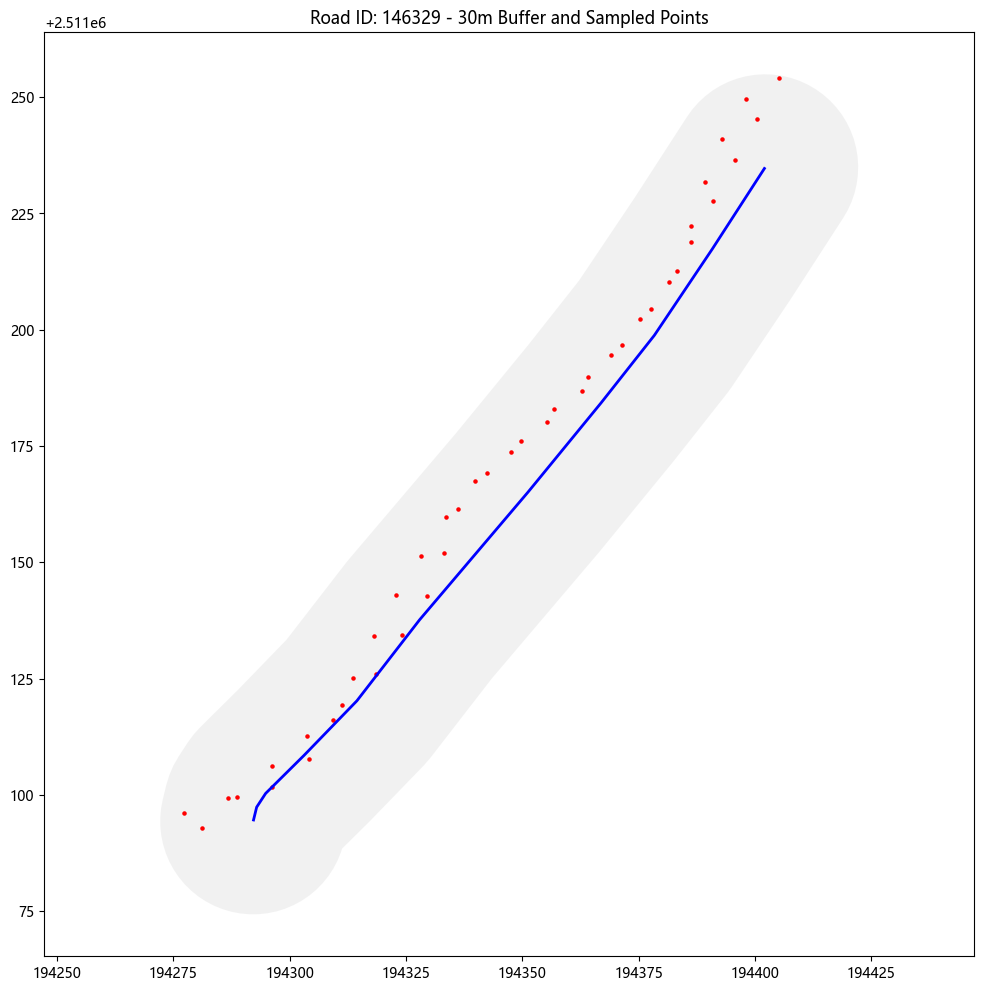

Road statistics:
{'link_id': 146329, 'num_sport': 43, 'buffer_distance': 20}


In [70]:

# Á°Æ‰øùÊäïÂΩ±ÊòØ UTMÔºàÊ∑±Âú≥ÈÄÇÁî®ÔºöEPSG:32650Ôºâ
road_net = road_net.to_crs(epsg=32650)

# ==== 2. ÂèÇÊï∞ËÆæÁΩÆ ====
buffer_distance = 20  # Âçï‰ΩçÔºöÁ±≥
selected_link_id = 146329

# ==== 3. Á≠õÈÄâÁõÆÊ†áÈÅìË∑Ø ====
selected_road = road_net[road_net['new_id'] == selected_link_id]

# ==== 4. ÁªòÂà∂‰∏éÁªüËÆ° ====
fig, ax = plt.subplots(figsize=(12, 12))

for idx, road in selected_road.iterrows():
    buffer_50m = road.geometry.buffer(buffer_distance)

    # Á≠õÈÄâËêΩÂÖ•ÁºìÂÜ≤Âå∫ÁöÑËøêÂä®ÁÇπÔºàÁ°Æ‰øù points_gdf Â∑≤ÊòØ GeoDataFrame ‰∏îÂêå‰∏∫EPSG:32649Ôºâ
    points_in_buffer = points_gdf[points_gdf.geometry.within(buffer_50m)]
    num_points_in_buffer = len(points_in_buffer)

    # Êõ¥Êñ∞ÁªüËÆ°Â≠óÊÆµÔºàËã•Â∞öÊú™Â≠òÂú® num_sport ÂàóÔºåÂèØÂÖàÂàùÂßãÂåñÔºâ
    if "num_sport" not in road_net.columns:
        road_net["num_sport"] = 0
    road_net.loc[idx, "num_sport"] = num_points_in_buffer

    # ÂèØËßÜÂåñÈÅìË∑Ø„ÄÅÁºìÂÜ≤Âå∫„ÄÅÁÇπ
    gpd.GeoSeries([road.geometry]).plot(ax=ax, color="blue", linewidth=2, label=f"Road {road['new_id']}")
    gpd.GeoSeries([buffer_50m]).plot(ax=ax, color="lightgray", alpha=0.3)
    points_in_buffer.plot(ax=ax, color="red", markersize=5)

ax.set_title(f"Road ID: {selected_link_id} - 30m Buffer and Sampled Points")
plt.axis("equal")
plt.show()

# ==== 5. ËæìÂá∫ÁªìÊûú ====
road_stats = {
    "link_id": selected_link_id,
    "num_sport": num_points_in_buffer,
    "buffer_distance": buffer_distance
}
print("Road statistics:")
print(road_stats)

In [39]:
import geopandas as gpd
from tqdm import tqdm

# ÂàùÂßãÂåñÂ≠óÊÆµ
for col in ["num_sport_10", "num_sport_20", "num_sport_30"]:
    if col not in road_net.columns:
        road_net[col] = 0

# ÂàõÂª∫Á©∫Èó¥Á¥¢ÂºïÔºàÂè™ÈúÄ‰∏ÄÊ¨°ÔºåÊûÅÂ§ßÊèêÈÄüÔºâ
points_sindex = points_gdf.sindex

# ÈÄâÂèñÂâç1000Êù°ÈÅìË∑Ø
top_1000_roads = road_net.head(1000)

# ÁºìÂÜ≤Ë∑ùÁ¶ªÂàóË°®
buffer_distances = [10, 20, 30]

# ‰∏ªÂæ™ÁéØ
for idx, road in tqdm(top_1000_roads.iterrows(), total=len(top_1000_roads), desc="Processing Roads", unit="road"):
    for dist in buffer_distances:
        buffer_geom = road.geometry.buffer(dist)

        # ‰ΩøÁî®Á©∫Èó¥Á¥¢ÂºïÂÖàÂÅöbboxÁ≤óÁ≠õÔºàÂ§ßÂπÖÂä†ÈÄüÔºâ
        possible_matches_index = list(points_sindex.intersection(buffer_geom.bounds))
        possible_matches = points_gdf.iloc[possible_matches_index]

        # ÂÜçÂÅöÁ≤æÂáÜÁöÑ within Âà§Êñ≠
        precise_matches = possible_matches[possible_matches.geometry.within(buffer_geom)]

        # ÂÜôÂÖ•Â≠óÊÆµ
        road_net.at[idx, f"num_sport_{dist}"] = len(precise_matches)
top_1000_roads

Processing Roads: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 640.51road/s]


link_id oneway  Direction   name  class     length  lanes  free_speed  \
0        29.0     FT        1.0    ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   84.35005    2.0        60.0   
1    330130.0     FT        1.0    ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   97.89807    2.0        60.0   
2    333691.0     FT        1.0   None   ÂüéÂ∏ÇÊîØË∑Ø  202.35069    1.0        30.0   
3        30.0     FT        1.0    ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   90.16309    2.0        60.0   
4     32712.0      1        0.0   None   ÂüéÂ∏ÇÊîØË∑Ø  181.39623    1.0        30.0   
..        ...    ...        ...    ...    ...        ...    ...         ...   
995   99735.0     FT        1.0    Ê≤ô‰∫ïË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   10.11678    2.0        60.0   
996     503.0     FT        1.0  Ê≤ô‰∫ïÂçóÁéØË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   24.88180    2.0        60.0   
997  165235.0     FT        1.0   None   ‰∫∫Ë°åÈÅìË∑Ø    9.44098    1.0         5.0   
998  165236.0     FT        1.0   None   ‰∫∫Ë°åÈÅìË∑Ø    7.69426    1.0         5.0   
999     504.0     FT        1.0  Ê≤ô‰∫ïÂçóÁéØË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø  147.77221    2.0        60.0   

     capacity   link_types  ...      allow_uses dirname    UTM_prj new_id  \
0      1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N      1   
1      1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N      2   
2      1000.0  residential  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N      3   
3      1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N      4   
4      1000.0  residential  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N      5   
..        ...          ...  ...             ...     ...        ...    ...   
995    1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N    996   
996    1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N    997   
997     800.0      footway  ...            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N    998   
998     800.0      footway  ...            walk     Ê∑±Âú≥Â∏Ç  UTM84-50N    999   
999    1600.0    secondary  ...  auto;bike;walk     Ê∑±Âú≥Â∏Ç  UTM84-50N   1000   

         mm_len                                           geometry num_sport  \
0     84.350051  LINESTRING (202539.815 2495642.37, 202545.557 ...         0   
1     97.898071  LINESTRING (202442.527 2495631.464, 202451.359...         0   
2    202.350686  LINESTRING (202539.815 2495642.37, 202536.814 ...         0   
3     90.163086  LINESTRING (202623.506 2495652.874, 202645.168...         0   
4    181.396227  LINESTRING (202621.611 2495471.496, 202623.017...         0   
..          ...                                                ...       ...   
995   10.116776  LINESTRING (171231.206 2516200.854, 171227.404...         0   
996   24.881799  LINESTRING (171220.62 2516193.144, 171211.018 ...         0   
997    9.440982  LINESTRING (171223.121 2516202.248, 171220.62 ...         0   
998    7.694257  LINESTRING (171220.62 2516193.144, 171216.906 ...         0   
999  147.772213  LINESTRING (171195.896 2516195.585, 171048.344...         0   

     num_sport_10  num_sport_20  num_sport_30  
0               0             0             0  
1               0             0             0  
2               0             0             0  
3               0             0             0  
4               0             0             0  
..            ...           ...           ...  
995             0             0             0  
996             0             0             0  
997             0             0             0  
998             0             0             0  
999             0             0             0  

[1000 rows x 21 columns]

In [71]:
import geopandas as gpd
from tqdm import tqdm

# Á°Æ‰øùÂùêÊ†áÁ≥ª‰∏ÄËá¥
assert road_net.crs == points_gdf.crs

# ÂàùÂßãÂåñÂ≠óÊÆµ
for dist in [10, 20, 30]:
    col_name = f"num_sport_{dist}"
    if col_name not in road_net.columns:
        road_net[col_name] = 0

# ÂØπÊØè‰∏™Ë∑ùÁ¶ªÂÅöÁºìÂÜ≤Âå∫Âπ∂sjoin
for dist in [10, 20, 30]:
    print(f"üöÄ Â§ÑÁêÜ {dist}m ÁºìÂÜ≤Âå∫")
    road_net[f"buffer_{dist}"] = road_net.geometry.buffer(dist)
    buffer_gdf = gpd.GeoDataFrame(road_net.drop(columns='geometry'), geometry=road_net[f"buffer_{dist}"], crs=road_net.crs)

    # ÂÅöÁ©∫Èó¥ËøûÊé•ÔºöÂì™‰∫õÁÇπËêΩÂú®Âì™‰∏™ÁºìÂÜ≤Âå∫Èáå
    joined = gpd.sjoin(points_gdf, buffer_gdf, predicate="within", how="inner")

    # ÁªüËÆ°ÊØèÊù°ËæπÁöÑÁÇπÊï∞Ôºàindex_right ÊòØÂåπÈÖçÂà∞ÁöÑËæπ indexÔºâ
    counts = joined.groupby("index_right").size()

    # ÂÜôÂÖ•ÁªüËÆ°Â≠óÊÆµ
    for idx, count in counts.items():
        road_net.at[idx, f"num_sport_{dist}"] = count

    # Ê∏ÖÁêÜ‰∏≠Èó¥Âàó
    road_net = road_net.drop(columns=f"buffer_{dist}")


üöÄ Â§ÑÁêÜ 10m ÁºìÂÜ≤Âå∫
üöÄ Â§ÑÁêÜ 20m ÁºìÂÜ≤Âå∫
üöÄ Â§ÑÁêÜ 30m ÁºìÂÜ≤Âå∫


In [72]:
import numpy as np

# 1. ËÆ°ÁÆóÈïøÂ∫¶ÔºàËã•Â∞öÊú™Â≠òÂú®Ôºâ
if 'length' not in road_net.columns:
    road_net['length'] = road_net.geometry.length

# 2. ÂØπÊØè‰∏™ÁºìÂÜ≤Â∞∫Â∫¶ÂÅöÂØπÊï∞ÂΩí‰∏ÄÂåñ
for dist in [10, 20, 30]:
    count_col = f"num_sport_{dist}"
    log_col = f"log_d{dist}"
    norm_col = f"log_d{dist}_norm"

    # ËÆ°ÁÆóÂçï‰ΩçÈïøÂ∫¶ÁöÑËøêÂä®ÂØÜÂ∫¶
    density = road_net[count_col] / road_net["length"]
    road_net[log_col] = np.log(density + 1e-6)  # Âä†Âπ≥ÊªëÂõ†Â≠êÈò≤Ê≠¢ log(0)

    # ÂΩí‰∏ÄÂåñ
    min_val = road_net[log_col].min()
    max_val = road_net[log_col].max()
    road_net[norm_col] = (road_net[log_col] - min_val) / (max_val - min_val + 1e-9)

    # Âà†Èô§ÂØπÊï∞Â≠óÊÆµÔºåÂè™‰øùÁïôÂΩí‰∏ÄÂåñÁªìÊûú
    road_net = road_net.drop(columns=log_col)


In [73]:
road_net

link_id oneway  Direction  name  class     length  lanes  free_speed  \
0           29.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   84.35005    2.0        60.0   
1       330130.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   97.89807    2.0        60.0   
2       333691.0     FT        1.0  None   ÂüéÂ∏ÇÊîØË∑Ø  202.35069    1.0        30.0   
3           30.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   90.16309    2.0        60.0   
4        32712.0      1        0.0  None   ÂüéÂ∏ÇÊîØË∑Ø  181.39623    1.0        30.0   
...          ...    ...        ...   ...    ...        ...    ...         ...   
146327  344297.0     FT        1.0  None   Ëá™Ë°åËΩ¶ÈÅì  107.39451    1.0         5.0   
146328  344825.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  179.19024    1.0         5.0   
146329  345048.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  137.13006    1.0         5.0   
146330  345055.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  138.57457    1.0         5.0   
146331  345124.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  117.86582    1.0         5.0   

        capacity   link_types  ...  new_id      mm_len  \
0         1600.0    secondary  ...       1   84.350051   
1         1600.0    secondary  ...       2   97.898071   
2         1000.0  residential  ...       3  202.350686   
3         1600.0    secondary  ...       4   90.163086   
4         1000.0  residential  ...       5  181.396227   
...          ...          ...  ...     ...         ...   
146327     800.0     cycleway  ...  146328  107.394514   
146328     800.0      footway  ...  146329  179.190236   
146329     800.0      footway  ...  146330  137.130065   
146330     800.0      footway  ...  146331  138.574571   
146331     800.0      footway  ...  146332  117.865817   

                                                 geometry num_sport  \
0       LINESTRING (202539.815 2495642.37, 202545.557 ...         0   
1       LINESTRING (202442.527 2495631.464, 202451.359...         0   
2       LINESTRING (202539.815 2495642.37, 202536.814 ...         0   
3       LINESTRING (202623.506 2495652.874, 202645.168...         0   
4       LINESTRING (202621.611 2495471.496, 202623.017...         0   
...                                                   ...       ...   
146327  LINESTRING (188139.947 2524159.641, 188143.301...         0   
146328  LINESTRING (194402.199 2511234.928, 194390.841...        43   
146329  LINESTRING (190738.748 2495177.519, 190732.31 ...         0   
146330  LINESTRING (190744.483 2495113.512, 190740.252...         0   
146331  LINESTRING (191050.404 2509493.731, 191045.362...         0   

        num_sport_10  num_sport_20 num_sport_30  log_d10_norm  log_d20_norm  \
0                 28            79          121      0.638970      0.666384   
1                 20            88          126      0.614571      0.664394   
2               2659          4369         6545      0.823858      0.818456   
3                 25            94          132      0.629924      0.671579   
4                 28            58           81      0.600484      0.614298   
...              ...           ...          ...           ...           ...   
146327             1            20           24      0.459351      0.588102   
146328            36            43           48      0.613730      0.600389   
146329             4             8           12      0.516741      0.531849   
146330            21            31           37      0.599559      0.596988   
146331             0             0            0      0.000000      0.000000   

        log_d30_norm  
0           0.674956  
1           0.669792  
2           0.823297  
3           0.675926  
4           0.619391  
...              ...  
146327      0.586434  
146328      0.595061  
146329      0.541795  
146330      0.594907  
146331      0.000000  

[146332 rows x 24 columns]

In [75]:
# Â¶ÇÊûúÂ≠òÂú® 'num_sport' Â≠óÊÆµÔºåÂà†ÊéâÂÆÉ
if 'num_sport' in road_net.columns:
    road_net = road_net.drop(columns='num_sport')

road_net.to_file("SZ_road_net_sport_density.geojson", driver="GeoJSON")
print("Â∑≤ÂÆåÊàêË£ÅÂâ™ + Êù°‰ª∂Á≠õÈÄâÔºåÂπ∂ÂØºÂá∫‰∏∫ GeoJSON")


Â∑≤ÂÆåÊàêË£ÅÂâ™ + Êù°‰ª∂Á≠õÈÄâÔºåÂπ∂ÂØºÂá∫‰∏∫ GeoJSON


# Ë∑ØÁΩëÊåáÊ†á

In [76]:
import geopandas as gpd

# 1. ËØªÂèñË£ÅÂâ™ + ÂØÜÂ∫¶Â§ÑÁêÜÂêéÁöÑË∑ØÁΩëÔºàÂåÖÂê´ num_sport_10/20/30 Âíå log_d*_normÔºâ
road_net = gpd.read_file("SZ_road_net_sport_density.geojson")

# 2. Âà†Èô§ÂÜó‰ΩôÂ≠óÊÆµ 'num_sport'ÔºàÂ¶ÇÊûúÂ≠òÂú®Ôºâ
if 'num_sport' in road_net.columns:
    road_net = road_net.drop(columns='num_sport')

print(f"‚úÖ Â∑≤ÊàêÂäüËØªÂèñË∑ØÁΩëÔºåÂÖ± {len(road_net)} Êù°Ëæπ")


‚úÖ Â∑≤ÊàêÂäüËØªÂèñË∑ØÁΩëÔºåÂÖ± 146332 Êù°Ëæπ


‚öôÔ∏è ËÆ°ÁÆóÂÖ®Â±Ä Degree ‰∏≠ÂøÉÂ∫¶...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [00:03<00:00, 38288.39it/s]


üìç ËÆ°ÁÆóÂ±ÄÈÉ® Degree ‰∏≠ÂøÉÂ∫¶Ôºà800mÔºâ...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [00:04<00:00, 35596.42it/s]


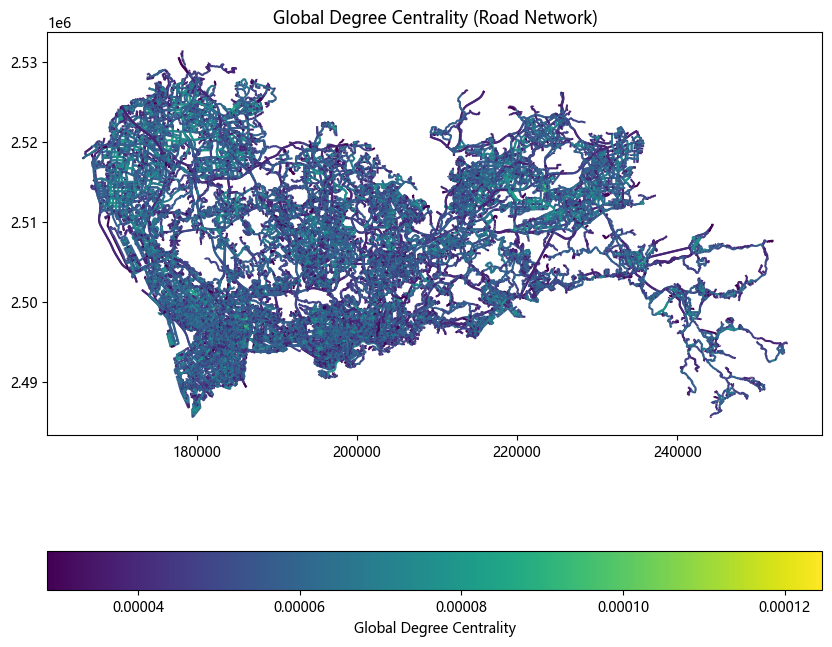

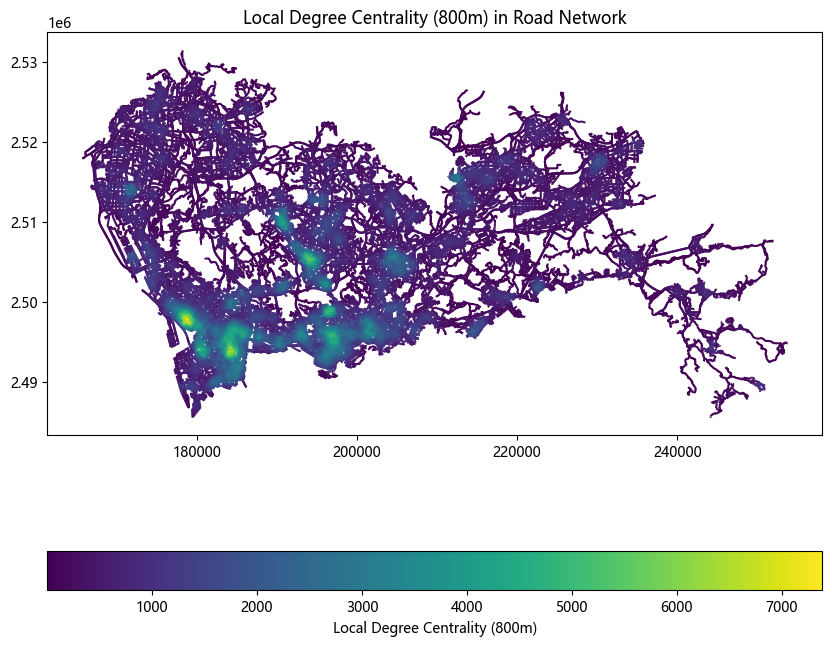

In [77]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import LineString, MultiLineString
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial import KDTree
from joblib import Parallel, delayed
import multiprocessing

# ==== ËØªÂèñË∑ØÁΩëÊï∞ÊçÆ ====
# road_net = gpd.read_file("‰Ω†ÁöÑË∑ØÁΩë.shp").to_crs(epsg=32649)

# ==== 1. ÊûÑÂª∫ÁΩëÁªúÂõæ ====
G = nx.Graph()
for _, row in road_net.iterrows():
    geom = row['geometry']
    if isinstance(geom, LineString):
        start = geom.coords[0]
        end = geom.coords[-1]
        G.add_edge(start, end)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            start = line.coords[0]
            end = line.coords[-1]
            G.add_edge(start, end)

node_list = list(G.nodes)
nodes_coords = np.array(node_list)
tree = KDTree(nodes_coords)

# ==== 2. ÂÖ®Â±Ä Degree ‰∏≠ÂøÉÂ∫¶ ====
print("‚öôÔ∏è ËÆ°ÁÆóÂÖ®Â±Ä Degree ‰∏≠ÂøÉÂ∫¶...")
deg_centrality = nx.degree_centrality(G)

def get_deg_for_road(row, deg_dict):
    geom = row.geometry
    total = 0
    if isinstance(geom, LineString):
        total += deg_dict.get(geom.coords[0], 0)
        total += deg_dict.get(geom.coords[-1], 0)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            total += deg_dict.get(line.coords[0], 0)
            total += deg_dict.get(line.coords[-1], 0)
    return total

tqdm.pandas()
road_net['deg_C'] = road_net.progress_apply(lambda row: get_deg_for_road(row, deg_centrality), axis=1)

# ==== 3. Â±ÄÈÉ® Degree ‰∏≠ÂøÉÂ∫¶Ôºà800mÔºâ====
print("üìç ËÆ°ÁÆóÂ±ÄÈÉ® Degree ‰∏≠ÂøÉÂ∫¶Ôºà800mÔºâ...")
local_deg_dict = {}
for i, node in enumerate(tqdm(node_list, desc="Â±ÄÈÉ® Degree")):
    idxs = tree.query_ball_point(nodes_coords[i], 800)
    neighbors = [node_list[j] for j in idxs]
    local_deg_dict[node] = sum(G.degree[n] for n in neighbors)

def get_local_deg(row):
    geom = row.geometry
    total = 0
    if isinstance(geom, LineString):
        total += local_deg_dict.get(geom.coords[0], 0)
        total += local_deg_dict.get(geom.coords[-1], 0)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            total += local_deg_dict.get(line.coords[0], 0)
            total += local_deg_dict.get(line.coords[-1], 0)
    return total

road_net['800_deg_C'] = road_net.progress_apply(get_local_deg, axis=1)

# ÂÖ®Â±ÄÂ∫¶‰∏≠ÂøÉÂ∫¶ÂèØËßÜÂåñ
fig, ax = plt.subplots(figsize=(10, 10))
road_net.plot(ax=ax, column='deg_C', legend=True,
              legend_kwds={'label': "Global Degree Centrality", 'orientation': "horizontal"})
plt.title("Global Degree Centrality (Road Network)")
plt.show()

# Â±ÄÈÉ®Â∫¶‰∏≠ÂøÉÂ∫¶ÂèØËßÜÂåñ
fig, ax = plt.subplots(figsize=(10, 10))
road_net.plot(ax=ax, column='800_deg_C', legend=True,
              legend_kwds={'label': "Local Degree Centrality (800m)", 'orientation': "horizontal"})
plt.title("Local Degree Centrality (800m) in Road Network")
plt.show()

In [84]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import LineString, MultiLineString
import numpy as np
from tqdm import tqdm
from scipy.spatial import KDTree

# === ÊûÑÂõæÔºàG Â∑≤ÊèêÂâçÈÄöËøá momepy Âª∫Â•ΩÔºâ ===
nodes_coords = np.array(list(G.nodes))
tree = KDTree(nodes_coords)

# === 4. ËÆ°ÁÆóËøë‰ººÂÖ®Â±Ä‰ªãÊï∞‰∏≠ÂøÉÂ∫¶ÔºàËäÇÁÇπÁ∫ßÔºâ ===
print("‚è≥ ËÆ°ÁÆóËøë‰ºº‰ªãÊï∞‰∏≠ÂøÉÂ∫¶‰∏≠...")
node_betweenness = nx.betweenness_centrality(G, k=1000, seed=42)

# ËÆ°ÁÆóË∑ØÊÆµ‰∏§Á´ØËäÇÁÇπÁöÑ‰∏≠ÂøÉÂ∫¶‰πãÂíå
def global_betweenness_sum(row, node_betweenness):
    geom = row.geometry
    total = 0
    if isinstance(geom, LineString):
        total += node_betweenness.get(tuple(geom.coords[0]), 0)
        total += node_betweenness.get(tuple(geom.coords[-1]), 0)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            total += node_betweenness.get(tuple(line.coords[0]), 0)
            total += node_betweenness.get(tuple(line.coords[-1]), 0)
    return total

# ËÆ°ÁÆó‰∏≠ÁÇπ‰∏∫‰∏≠ÂøÉÁöÑ 800m Â±ÄÈÉ®‰∏≠ÂøÉÂ∫¶
def local_betweenness_sum(row, node_betweenness, tree, nodes_coords, threshold=800):
    geom = row.geometry
    points = []

    if isinstance(geom, LineString):
        mid = len(geom.coords) // 2
        points = [geom.coords[mid]]
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            mid = len(line.coords) // 2
            points.append(line.coords[mid])
    
    total = 0
    for pt in points:
        idxs = tree.query_ball_point(pt, threshold)
        for idx in idxs:
            node = tuple(nodes_coords[idx])
            total += node_betweenness.get(node, 0)
    return total

# === 7. Â∫îÁî®ËÆ°ÁÆó ===
tqdm.pandas()

road_net['betw1000K'] = road_net.progress_apply(
    lambda row: global_betweenness_sum(row, node_betweenness), axis=1)

road_net['betw_800m'] = road_net.progress_apply(
    lambda row: local_betweenness_sum(row, node_betweenness, tree, nodes_coords), axis=1)



‚è≥ ËÆ°ÁÆóËøë‰ºº‰ªãÊï∞‰∏≠ÂøÉÂ∫¶‰∏≠...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [00:39<00:00, 3680.19it/s]


In [90]:
# === ËÆ°ÁÆóËäÇÁÇπÁ∫ßÊé•Ëøë‰∏≠ÂøÉÂ∫¶ÔºàÂÖ®ÂõæÔºâ ===
print("‚è≥ ËÆ°ÁÆóÊé•Ëøë‰∏≠ÂøÉÂ∫¶‰∏≠...")
node_closeness = nx.closeness_centrality(G)

# === ËÆ°ÁÆóË∑ØÊÆµ‰∏§Á´ØËäÇÁÇπÁöÑÊé•Ëøë‰∏≠ÂøÉÂ∫¶‰πãÂíå ===
def global_closeness_sum(row, node_closeness):
    geom = row.geometry
    total = 0
    if isinstance(geom, LineString):
        total += node_closeness.get(tuple(geom.coords[0]), 0)
        total += node_closeness.get(tuple(geom.coords[-1]), 0)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            total += node_closeness.get(tuple(line.coords[0]), 0)
            total += node_closeness.get(tuple(line.coords[-1]), 0)
    return total

# === ËÆ°ÁÆó‰∏≠ÁÇπ‰∏∫‰∏≠ÂøÉÁöÑ800mÈÇªÂüüÊé•Ëøë‰∏≠ÂøÉÂ∫¶ÊÄªÂíå ===
def local_closeness_sum(row, node_closeness, tree, nodes_coords, threshold=800):
    geom = row.geometry
    points = []

    if isinstance(geom, LineString):
        mid = len(geom.coords) // 2
        points = [geom.coords[mid]]
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            mid = len(line.coords) // 2
            points.append(line.coords[mid])
    
    total = 0
    for pt in points:
        idxs = tree.query_ball_point(pt, threshold)
        for idx in idxs:
            node = tuple(nodes_coords[idx])
            total += node_closeness.get(node, 0)
    return total

# === Â∫îÁî®ËÆ°ÁÆó ===
road_net['clo'] = road_net.progress_apply(
    lambda row: global_closeness_sum(row, node_closeness), axis=1)

road_net['clo_800m'] = road_net.progress_apply(
    lambda row: local_closeness_sum(row, node_closeness, tree, nodes_coords), axis=1)


‚è≥ ËÆ°ÁÆóÊé•Ëøë‰∏≠ÂøÉÂ∫¶‰∏≠...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [00:38<00:00, 3777.73it/s]


In [94]:
from tqdm import tqdm
import numpy as np
import networkx as nx

tqdm.pandas()  # ÂêØÁî® tqdm ËøõÂ∫¶Êù°

# ==== Â±ÄÈÉ®Ê∑±Â∫¶ÂáΩÊï∞ ====
def local_depth_800m(row, G, tree, nodes_coords, threshold=800, use_weight=False):
    geom = row.geometry
    points = []

    # Ëé∑Âèñ‰∏≠ÁÇπÂùêÊ†á
    if isinstance(geom, LineString):
        mid = len(geom.coords) // 2
        points = [geom.coords[mid]]
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            mid = len(line.coords) // 2
            points.append(line.coords[mid])

    all_depths = []

    for pt in points:
        # ÊâæÂà∞Á¶ª‰∏≠ÁÇπÊúÄËøëÁöÑÂõæËäÇÁÇπ
        _, idx = tree.query(pt)
        origin_node = tuple(nodes_coords[idx])

        # Êü•ËØ¢800Á±≥ÂÜÖÊâÄÊúâÂõæËäÇÁÇπ
        idxs = tree.query_ball_point(pt, threshold)

        for i in idxs:
            target_node = tuple(nodes_coords[i])
            if target_node == origin_node:
                continue
            try:
                if use_weight:
                    path_len = nx.shortest_path_length(G, source=origin_node, target=target_node, weight='length')
                else:
                    path_len = nx.shortest_path_length(G, source=origin_node, target=target_node)
                all_depths.append(path_len)
            except nx.NetworkXNoPath:
                continue

    return np.mean(all_depths) if all_depths else np.nan

# ==== Â∫îÁî®Âà∞ road_net ====
road_net['depth_800m'] = road_net.progress_apply(
    lambda row: local_depth_800m(row, G, tree, nodes_coords, threshold=800, use_weight=False), axis=1
)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [1:06:29<00:00, 36.68it/s]


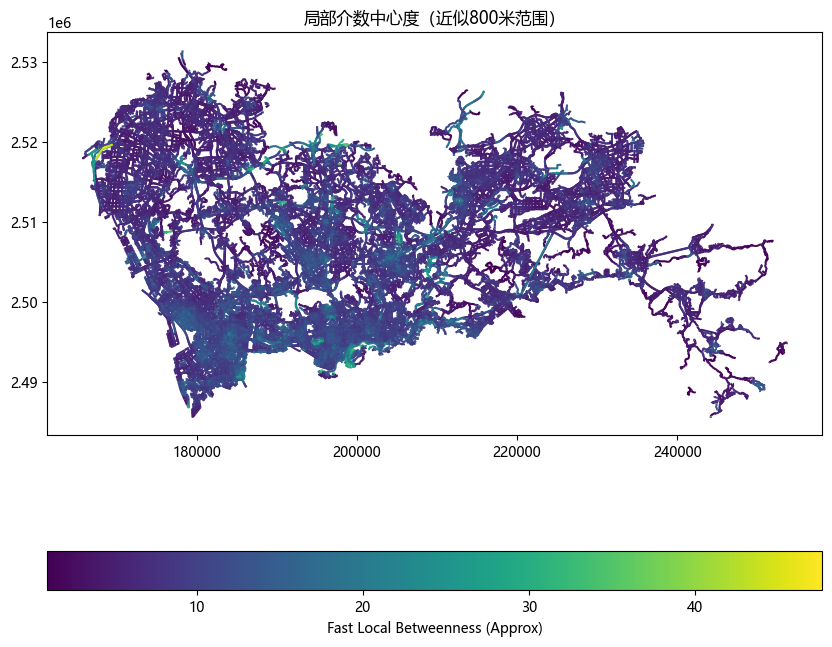

In [96]:
road_net.plot(
    column='depth_800m',
    legend=True,
    legend_kwds={'label': "Fast Local Betweenness (Approx)", 'orientation': "horizontal"},
    figsize=(10, 10)
)
plt.title("Â±ÄÈÉ®‰ªãÊï∞‰∏≠ÂøÉÂ∫¶ÔºàËøë‰ºº800Á±≥ËåÉÂõ¥Ôºâ")
plt.show()


In [97]:
road_net.to_file("SZ_road_bet_clo.geojson", driver="GeoJSON")
print("Â∑≤ÂÆåÊàêË£ÅÂâ™ + Êù°‰ª∂Á≠õÈÄâÔºåÂπ∂ÂØºÂá∫‰∏∫ GeoJSON")

Â∑≤ÂÆåÊàêË£ÅÂâ™ + Êù°‰ª∂Á≠õÈÄâÔºåÂπ∂ÂØºÂá∫‰∏∫ GeoJSON


In [95]:
road_net

link_id oneway  Direction  name  class     length  lanes  free_speed  \
0           29.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   84.35005    2.0        60.0   
1       330130.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   97.89807    2.0        60.0   
2       333691.0     FT        1.0  None   ÂüéÂ∏ÇÊîØË∑Ø  202.35069    1.0        30.0   
3           30.0     FT        1.0   ÂòâÂÆæË∑Ø  ÂüéÂ∏Ç‰∏ªÂπ≤Ë∑Ø   90.16309    2.0        60.0   
4        32712.0      1        0.0  None   ÂüéÂ∏ÇÊîØË∑Ø  181.39623    1.0        30.0   
...          ...    ...        ...   ...    ...        ...    ...         ...   
146327  344297.0     FT        1.0  None   Ëá™Ë°åËΩ¶ÈÅì  107.39451    1.0         5.0   
146328  344825.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  179.19024    1.0         5.0   
146329  345048.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  137.13006    1.0         5.0   
146330  345055.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  138.57457    1.0         5.0   
146331  345124.0     FT        1.0  None   ‰∫∫Ë°åÈÅìË∑Ø  117.86582    1.0         5.0   

        capacity   link_types  ...  log_d30_norm  \
0         1600.0    secondary  ...      0.674956   
1         1600.0    secondary  ...      0.669792   
2         1000.0  residential  ...      0.823297   
3         1600.0    secondary  ...      0.675926   
4         1000.0  residential  ...      0.619391   
...          ...          ...  ...           ...   
146327     800.0     cycleway  ...      0.586434   
146328     800.0      footway  ...      0.595061   
146329     800.0      footway  ...      0.541795   
146330     800.0      footway  ...      0.594907   
146331     800.0      footway  ...      0.000000   

                                                 geometry     deg_C 800_deg_C  \
0       LINESTRING (202539.815 2495642.37, 202545.557 ...  0.000058      2386   
1       LINESTRING (202442.527 2495631.464, 202451.359...  0.000058      2439   
2       LINESTRING (202539.815 2495642.37, 202536.814 ...  0.000058      2361   
3       LINESTRING (202623.506 2495652.874, 202645.168...  0.000058      2323   
4       LINESTRING (202621.611 2495471.496, 202623.017...  0.000058      2230   
...                                                   ...       ...       ...   
146327  LINESTRING (188139.947 2524159.641, 188143.301...  0.000038       341   
146328  LINESTRING (194402.199 2511234.928, 194390.841...  0.000029       544   
146329  LINESTRING (190738.748 2495177.519, 190732.31 ...  0.000058      2672   
146330  LINESTRING (190744.483 2495113.512, 190740.252...  0.000058      2679   
146331  LINESTRING (191050.404 2509493.731, 191045.362...  0.000029      3854   

        fast_local_betweenness  betw1000K  betw_800m       clo   clo_800m  \
0                     0.450092   0.000439   0.395289  0.027722   5.868096   
1                     0.495847   0.000088   0.429459  0.027679   6.027586   
2                     0.481944   0.000012   0.430036  0.027848   5.834304   
3                     0.436624   0.000866   0.379640  0.027609   5.686274   
4                     0.453929   0.000885   0.400417  0.027892   5.702661   
...                        ...        ...        ...       ...        ...   
146327                0.001760   0.000015   0.001932  0.021289   0.636023   
146328                0.669064   0.000010   0.669832  0.033064   1.873227   
146329                0.037751   0.000140   0.083896  0.026105   6.034368   
146330                0.095853   0.000256   0.147638  0.026711   6.106585   
146331                0.145987   0.000010   0.211713  0.028975  10.357285   

        depth_800m  
0        11.968397  
1        12.054945  
2        12.294521  
3        11.502336  
4        11.454545  
...            ...  
146327    4.701754  
146328    7.619048  
146329   11.902597  
146330   11.751073  
146331   15.845170  

[146332 rows x 31 columns]

# Ë°óÊôØÂ§ÑÁêÜ

Processing roads: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 14.60road/s]


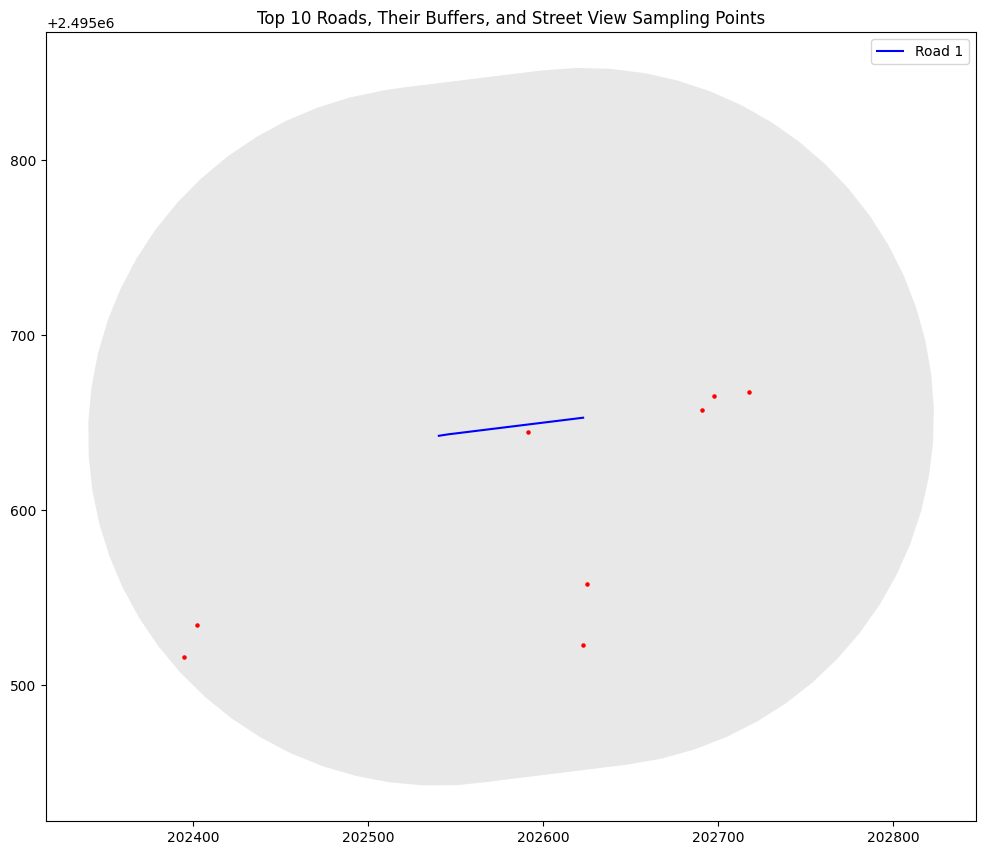

Road 1 summary:
{'road': 33555.6875, 'sidewalk': 10150.5, 'building': 55141.625, 'wall': 1393.1875, 'fence': 4484.9062, 'pole': 1331.3125, 'traffic li': 9.875, 'traffic si': 387.0, 'vegetation': 29782.8438, 'terrain': 930.6562, 'sky': 12094.0312, 'person': 1382.7812, 'rider': 202.1875, 'car': 19109.0, 'truck': 526.4375, 'bus': 338.3438, 'train': 101.5, 'motorcycle': 307.7812, 'bicycle': 1570.3438, 'bg': 0.0}
----------------------------------------


In [3]:
import geopandas as gpd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString

# 1. ÂÆö‰πâÈúÄË¶ÅÊ±áÊÄªÁöÑÂ≠óÊÆµÔºàÂèØ‰ª•Ê†πÊçÆÂÆûÈôÖÊÉÖÂÜµ‰øÆÊîπÔºâ
fields_to_aggregate = [
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic li', 'traffic si',
    'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'bg'
]

# 2. ËØªÂèñË∑ØÁΩëÂíåË°óÊôØÈááÊ†∑ÁÇπÊï∞ÊçÆ
road_net = gpd.read_file("SZ_road_bet_clo.geojson")
street_view_gdf = gpd.read_file("Perceived Space\Ë°óÊôØ_STDC_2024\Ê∑±Âú≥Ë°óÊôØÈááÊ†∑ÁÇπ.shp")

# ËΩ¨Êç¢Ë°óÊôØÈááÊ†∑ÁÇπÂùêÊ†áÁ≥ª‰∏∫Ë∑ØÁΩëÁöÑÂùêÊ†áÁ≥ª
street_view_gdf = street_view_gdf.to_crs(road_net.crs)

# 3. ÈÄâÊã©Ââç 10 Êù°Ë∑ØÁΩë
top_10_roads = road_net.iloc[:1]

# 4. ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÂ≠óÂÖ∏ÔºåÁî®‰∫éÂ≠òÂÇ®ÊØèÊù°Ë∑ØÁΩëÁöÑÊ±áÊÄªÁªìÊûú
aggregated_data_top_10 = {}

# 5. ÂèØËßÜÂåñÂâç 10 Êù°Ë∑ØÁΩë„ÄÅÂÆÉ‰ª¨ÁöÑÁºìÂÜ≤Âå∫ÂíåËêΩÂú®ÁºìÂÜ≤Âå∫ÂÜÖÁöÑË°óÊôØÈááÊ†∑ÁÇπ
fig, ax = plt.subplots(figsize=(12, 12))

# ÈÅçÂéÜÂâç 10 Êù°Ë∑ØÁΩë
for idx, road in tqdm(top_10_roads.iterrows(), total=len(top_10_roads), desc="Processing roads", unit="road"):
    # ‰∏∫ÊØèÊù°Ë∑ØÁΩëÂª∫Á´ã 50 Á±≥ÁöÑÁºìÂÜ≤Âå∫
    buffer_50m = road.geometry.buffer(200)
    
    # ÊâæÂá∫ËêΩÂú®ÁºìÂÜ≤Âå∫ÂÜÖÁöÑË°óÊôØÈááÊ†∑ÁÇπ
    street_view_in_buffer = street_view_gdf[street_view_gdf.geometry.within(buffer_50m)]
    
    # Ê±áÊÄªÈááÊ†∑ÁÇπÊï∞ÊçÆ
    road_data = {}
    for field in fields_to_aggregate:
        if field in street_view_in_buffer.columns:
            road_data[field] = street_view_in_buffer[field].mean()
            road_data[field] = round(road_data[field], 4)  # ‰øùÁïô 4 ‰ΩçÂ∞èÊï∞

    # Â¶ÇÊûúËøôÊù°Ë∑ØÁΩëÊ≤°ÊúâÈááÊ†∑ÁÇπÔºåÂàô‰ΩøÁî®Áõ∏ÈÇªÈÅìË∑ØÊèíÂÄº
    if len(street_view_in_buffer) == 0:
        # Êü•Êâæ‰∏éÂΩìÂâçÈÅìË∑ØÁõ∏ËøûÁöÑË∑ØÁΩë
        connected_roads = road_net[road_net.geometry.intersects(road.geometry)]
        
        # Â¶ÇÊûúÊúâÁõ∏ÈÇªÈÅìË∑ØÔºåËøõË°åÊèíÂÄº
        if len(connected_roads) > 0:
            for field in fields_to_aggregate:
                if field in connected_roads.columns:
                    road_data[field] = connected_roads[field].mean()
                    road_data[field] = round(road_data[field], 4)
        else:
            # Â¶ÇÊûúÊ≤°ÊúâÁõ∏ÈÇªÈÅìË∑ØÔºå‰ΩøÁî®ÊúÄÊé•ËøëÁöÑÈÅìË∑Ø
            # ËÆ°ÁÆóÂΩìÂâçÈÅìË∑Ø‰∏éÊâÄÊúâÂÖ∂‰ªñÈÅìË∑ØÁöÑË∑ùÁ¶ªÔºåÈÄâÊã©ÊúÄËøëÁöÑÈÅìË∑Ø
            road_net['distance'] = road_net.geometry.distance(road.geometry)
            nearest_road = road_net.loc[road_net['distance'].idxmin()]
            
            # Ëé∑ÂèñÊúÄÊé•ËøëÈÅìË∑ØÁöÑÂ≠óÊÆµÊï∞ÊçÆ
            for field in fields_to_aggregate:
                if field in nearest_road:
                    road_data[field] = nearest_road[field]
                    road_data[field] = round(road_data[field], 4)

    # ‰øùÂ≠òÊØèÊù°Ë∑ØÁΩëÁöÑÊ±áÊÄªÊï∞ÊçÆ
    aggregated_data_top_10[road['new_id']] = road_data  # Áî® 'Ref' ‰Ωú‰∏∫ÂîØ‰∏ÄÊ†áËØÜÁ¨¶

    # ÁªòÂà∂Ë∑ØÁΩëÔºà‰ΩøÁî® gpd.GeoSeries.plot Êù•ÁªòÂà∂Âá†‰ΩïÔºâ
    gpd.GeoSeries([road.geometry]).plot(ax=ax, color="blue", linewidth=1.5, label=f"Road {int(road['new_id'])}")

    # ÁªòÂà∂ÁºìÂÜ≤Âå∫
    gpd.GeoSeries([buffer_50m]).plot(ax=ax, color="lightgray", alpha=0.5)

    # ÁªòÂà∂ËêΩÂú®ÁºìÂÜ≤Âå∫ÂÜÖÁöÑË°óÊôØÈááÊ†∑ÁÇπ
    if len(street_view_in_buffer) > 0:
        street_view_in_buffer.plot(ax=ax, color="red", markersize=5)

# Ê∑ªÂä†Âõæ‰æãÂíåÊ†áÈ¢ò
ax.set_title("Top 10 Roads, Their Buffers, and Street View Sampling Points")
ax.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

# ËæìÂá∫Ââç10Êù°Ë∑ØÁΩëÁöÑÊ±áÊÄªÁªìÊûú
for road_id, data in aggregated_data_top_10.items():
    print(f"Road {road_id} summary:")
    print(data)
    print("-" * 40)


In [5]:
import geopandas as gpd
import numpy as np
from tqdm import tqdm

# 1. ÂÆö‰πâÈúÄË¶ÅÊ±áÊÄªÁöÑÂ≠óÊÆµ
fields_to_aggregate = [
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic li', 'traffic si',
    'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'
]

# ËΩ¨Êç¢Ë°óÊôØÈááÊ†∑ÁÇπÂùêÊ†áÁ≥ª‰∏∫Ë∑ØÁΩëÁöÑÂùêÊ†áÁ≥ª
street_view_gdf = street_view_gdf.to_crs(road_net.crs)

# 3. ÂàõÂª∫Ë°óÊôØÈááÊ†∑ÁÇπÁöÑÁ©∫Èó¥Á¥¢Âºï
points_gdf_sindex = street_view_gdf.sindex

# 4. ‰∏∫ÊØèÊù°ÈÅìË∑ØÁîüÊàêÁºìÂÜ≤Âå∫Âπ∂Ê±áËÅöÈááÊ†∑ÁÇπÊï∞ÊçÆ
aggregated_data_all_roads = {}

# 5. ËøõÂ∫¶Êù°Â§ÑÁêÜÊâÄÊúâÈÅìË∑Ø
for idx, road in tqdm(road_net.iterrows(), total=len(road_net), desc="Processing Roads", unit="road"):
    # ‰∏∫ÊØèÊù°Ë∑ØÁΩëÁîüÊàê50Á±≥ÁöÑÁºìÂÜ≤Âå∫
    buffer_50m = road.geometry.buffer(100)
    
    # ‰ΩøÁî®Á©∫Èó¥Á¥¢ÂºïÊü•ÊâæÁºìÂÜ≤Âå∫ÂÜÖÁöÑÈááÊ†∑ÁÇπ
    possible_matches_index = list(points_gdf_sindex.intersection(buffer_50m.bounds))  # Ëé∑Âèñ‰∏éÁºìÂÜ≤Âå∫ÊúâÈáçÂè†ÁöÑÁÇπÁ¥¢Âºï
    possible_matches = street_view_gdf.iloc[possible_matches_index]  # ÈÄâÊã©Ëøô‰∫õÁÇπ
    precise_matches = possible_matches[possible_matches.geometry.within(buffer_50m)]  # Á≤æÁ°ÆÁ≠õÈÄâËêΩÂú®ÁºìÂÜ≤Âå∫ÂÜÖÁöÑÁÇπ
    
    # Ê±áÊÄªÈááÊ†∑ÁÇπÊï∞ÊçÆ
    road_data = {}
    for field in fields_to_aggregate:
        if field in precise_matches.columns:
            road_data[field] = precise_matches[field].mean()
            road_data[field] = round(road_data[field], 4)  # ‰øùÁïô 4 ‰ΩçÂ∞èÊï∞
    
    # Â¶ÇÊûúËøôÊù°Ë∑ØÁΩëÊ≤°ÊúâÈááÊ†∑ÁÇπÔºåÂàô‰ΩøÁî®Áõ∏ÈÇªÈÅìË∑ØÊèíÂÄº
    if len(precise_matches) == 0:
        # Êü•Êâæ‰∏éÂΩìÂâçÈÅìË∑ØÁõ∏ËøûÁöÑË∑ØÁΩë
        connected_roads = road_net[road_net.geometry.intersects(road.geometry)]
        
        # Â¶ÇÊûúÊúâÁõ∏ÈÇªÈÅìË∑ØÔºåËøõË°åÊèíÂÄº
        if len(connected_roads) > 0:
            for field in fields_to_aggregate:
                if field in connected_roads.columns:
                    road_data[field] = connected_roads[field].mean()
                    road_data[field] = round(road_data[field], 4)
        else:
            # Â¶ÇÊûúÊ≤°ÊúâÁõ∏ÈÇªÈÅìË∑ØÔºå‰ΩøÁî®ÊúÄÊé•ËøëÁöÑÈÅìË∑Ø
            # ËÆ°ÁÆóÂΩìÂâçÈÅìË∑Ø‰∏éÊâÄÊúâÂÖ∂‰ªñÈÅìË∑ØÁöÑË∑ùÁ¶ªÔºåÈÄâÊã©ÊúÄËøëÁöÑÈÅìË∑Ø
            road_net['distance'] = road_net.geometry.distance(road.geometry)
            nearest_road = road_net.loc[road_net['distance'].idxmin()]
            
            # Ëé∑ÂèñÊúÄÊé•ËøëÈÅìË∑ØÁöÑÂ≠óÊÆµÊï∞ÊçÆ
            for field in fields_to_aggregate:
                if field in nearest_road:
                    road_data[field] = nearest_road[field]
                    road_data[field] = round(road_data[field], 4)

    # ‰øùÂ≠òÊØèÊù°Ë∑ØÁΩëÁöÑÊ±áÊÄªÊï∞ÊçÆ
    aggregated_data_all_roads[road['new_id']] = road_data  # Áî® 'new_id' ‰Ωú‰∏∫ÂîØ‰∏ÄÊ†áËØÜÁ¨¶
    
    # Êõ¥Êñ∞Ë∑ØÁΩëÊï∞ÊçÆÔºåÊ∑ªÂä†Ê±áÊÄªÂ≠óÊÆµ
    for field, value in road_data.items():
        road_net.loc[idx, field] = value  # Êõ¥Êñ∞ÊØèÊù°ÈÅìË∑ØÁöÑÊ±áÊÄªÂ≠óÊÆµ

# ËæìÂá∫Ê±áÊÄªÊï∞ÊçÆÔºàÁ§∫‰æãÊü•ÁúãÂâç 5 Êù°Ôºâ
print(road_net[['link_id', 'road', 'sidewalk', 'building', 'car']].head())

Processing Roads: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 146332/146332 [16:27<00:00, 148.11road/s]

    link_id        road    sidewalk    building         car
0      29.0  33742.3500  10738.5500  55631.1500  20223.3000
1  330130.0  31423.7500   7715.0000  47728.2500  21891.0000
2  333691.0  33679.3625  10412.6500  42304.0625  15797.6000
3      30.0  33742.3500  10738.5500  55631.1500  20223.3000
4   32712.0  32984.1250  13183.5417  57198.4583  17419.9583


In [8]:
# Âà†Èô§ 'bg' Â≠óÊÆµ
road_net = road_net.drop(columns=['bg'])

In [9]:
# Êü•Áúãroad_net1‰∏≠ÁöÑÊâÄÊúâÂ≠óÊÆµÂêçÁß∞
print(road_net.columns)

Index(['link_id', 'oneway', 'Direction', 'name', 'class', 'length', 'lanes',
       'free_speed', 'capacity', 'link_types', 'link_type', 'allow_uses',
       'dirname', 'UTM_prj', 'new_id', 'mm_len', 'num_sport_10',
       'num_sport_20', 'num_sport_30', 'log_d10_norm', 'log_d20_norm',
       'log_d30_norm', 'deg_C', '800_deg_C', 'fast_local_betweenness',
       'betw1000K', 'betw_800m', 'clo', 'clo_800m', 'depth_800m', 'geometry',
       'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic li',
       'traffic si', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car',
       'truck', 'bus', 'train', 'motorcycle', 'bicycle'],
      dtype='object')


In [10]:
road_net.to_file("SZ_road_bet_clo_SVI.geojson", driver="GeoJSON")

ÂéüÂßãÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö
length              0
lanes               0
free_speed          0
capacity            0
800_deg_C           0
betw_800m           0
clo                 0
clo_800m            0
depth_800m         24
road            30960
sidewalk        30960
building        30960
wall            30960
fence           30960
pole            30960
traffic li      30960
traffic si      30960
vegetation      30960
terrain         30960
sky             30960
person          30960
rider           30960
car             30960
truck           30960
bus             30960
train           30960
motorcycle      30960
bicycle         30960
link_type           0
log_d20_norm        0
dtype: int64
Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö
length        0
lanes         0
free_speed    0
capacity      0
800_deg_C     0
betw_800m     0
clo           0
clo_800m      0
depth_800m    0
road          0
sidewalk      0
building      0
wall          0
fence         0
pole          0
t

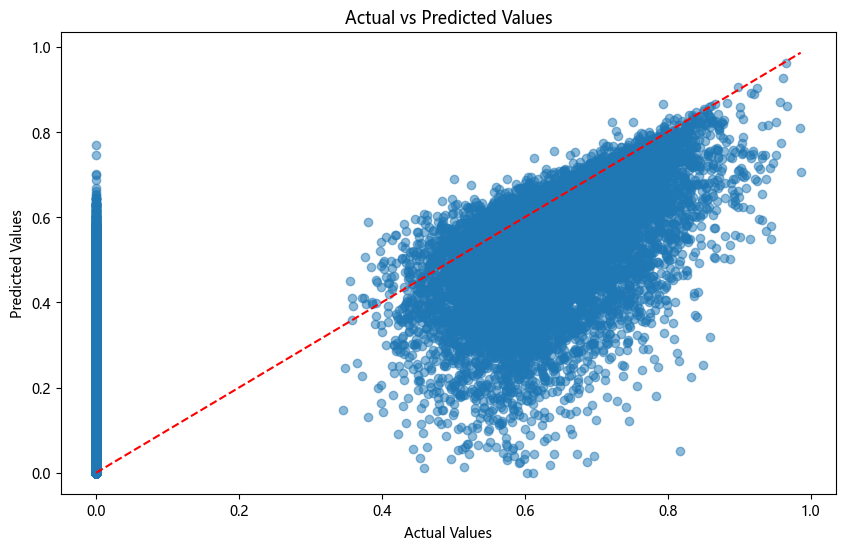

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ÂÅáËÆæ road_net Â∑≤ÁªèÂä†ËΩΩÂπ∂ÂåÖÂê´ÊâÄÊúâÂ≠óÊÆµ
# ÁõÆÊ†áÂèòÈáè
target = 'log_d20_norm'

# 2. Â§ÑÁêÜÂ§öÊ®°ÊÄÅÊ†áÁ≠æÔºàÂ¶Ç allow_useÔºâ
allow_use_options = ['walk', 'bike', 'auto']
for option in allow_use_options:
    road_net[f'allow_{option}'] = road_net['allow_uses'].apply(lambda x: 1 if option in x else 0)

# 3. ÊèêÂèñÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
selected_features = [
    'length', 'lanes', 'free_speed', 'capacity', '800_deg_C', 'betw_800m', 
    'clo', 'clo_800m', 'depth_800m','road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic li', 
    'traffic si', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 
    'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'link_type'
]

# Á°Æ‰øùÊâÄÊúâÈÄâÊã©ÁöÑÁâπÂæÅÈÉΩÂú®Êï∞ÊçÆÈõÜ‰∏≠
missing_features = [feature for feature in selected_features if feature not in road_net.columns]
if missing_features:
    raise ValueError(f"‰ª•‰∏ãÁâπÂæÅÂú®Êï∞ÊçÆÈõÜ‰∏≠Áº∫Â§±: {missing_features}")

# Ê£ÄÊü•ÂéüÂßãÊï∞ÊçÆÈõÜ‰∏≠ÊòØÂê¶Êúâ NaN ÂÄº
print("ÂéüÂßãÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(road_net[selected_features + [target]].isnull().sum())

# Âà†Èô§ÊâÄÊúâÂåÖÂê´ NaN ÁöÑÊï∞ÊçÆË°å
road_net_cleaned = road_net.dropna(subset=selected_features + [target])

# ÊèêÂèñÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = road_net_cleaned[selected_features]  # ÁâπÂæÅ
y = road_net_cleaned[target]  # ÁõÆÊ†áÂèòÈáè

# Ê£ÄÊü•Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ‰∏≠ÊòØÂê¶Êúâ NaN ÂÄº
print("Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁº∫Â§±ÂÄºÁªüËÆ°Ôºö")
print(X.isnull().sum())
print(y.isnull().sum())

# Â¶ÇÊûúÊúâÂàÜÁ±ªÂèòÈáèÔºåËøõË°å One-Hot Encoding
if 'link_type' in X.columns:
    X = pd.get_dummies(X, columns=['link_type'], drop_first=True)

# Ê£ÄÊü•ÁâπÂæÅÂÄºÊòØÂê¶ÂÖ®‰∏∫Â∏∏Êï∞
constant_features = X.columns[X.nunique() == 1]
print("Â∏∏Êï∞ÁâπÂæÅÔºö", constant_features)
if len(constant_features) > 0:
    X.drop(columns=constant_features, inplace=True)

# 4. ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. ÂàùÂßãÂåñÈöèÊú∫Ê£ÆÊûóÊ®°Âûã
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

# 6. ËÆ≠ÁªÉÊ®°Âûã
rf_model.fit(X_train, y_train)

# 7. È¢ÑÊµã
y_pred = rf_model.predict(X_test)

# 8. ËØÑ‰º∞Ê®°Âûã
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 9. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)
print(importance_df)

# 10. Êï£ÁÇπÂõæÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # ÁªòÂà∂ÂØπËßíÁ∫ø
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()